# Verifying that lateral GABA inhibtion affects firing rate in a population

In [1]:
%matplotlib inline

import os
import numpy as np
network_path = os.path.join("..", "networks", "sten_1")
network_file = os.path.join(network_path, "network-synapses-minimal.hdf5")
simulation_file_with_synapses = os.path.join(network_path, "simulation", "output-with-synapses-sten_1-A.hdf5")
simulation_file_no_synapses = os.path.join(network_path, "simulation", "output-no-synapses-sten_1-A.hdf5")
duration = 18

# Plot network

Reading SNUDDA_DATA=../../../../../../BasalGangliaData/data/ from ../networks/sten_1/network-config.json
Population unit 0 has 32000 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons
Population unit 0 has 32000 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons


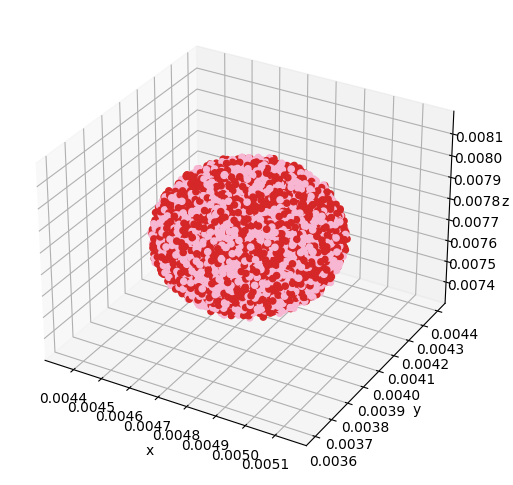

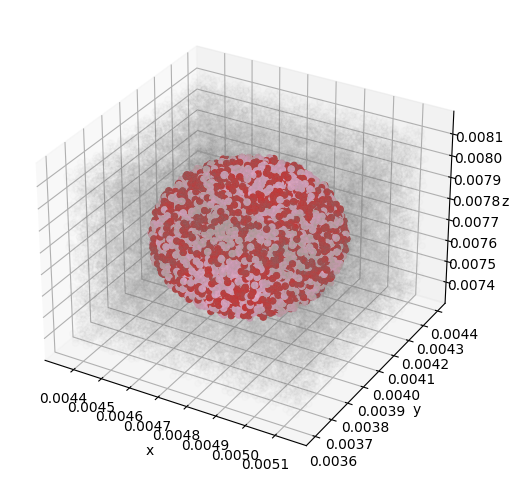

In [2]:
from snudda.plotting import PlotNetwork

pn = PlotNetwork(network_path)
pn.plot_populations(unmarked_alpha=0)
pn.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

Reading SNUDDA_DATA=../../../../../../BasalGangliaData/data/ from ../networks/sten_1/network-config.json
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons


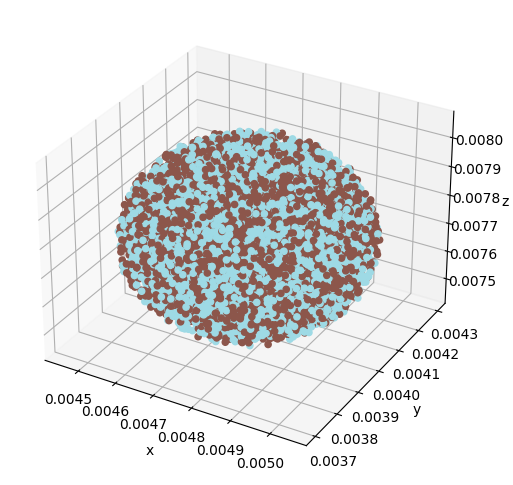

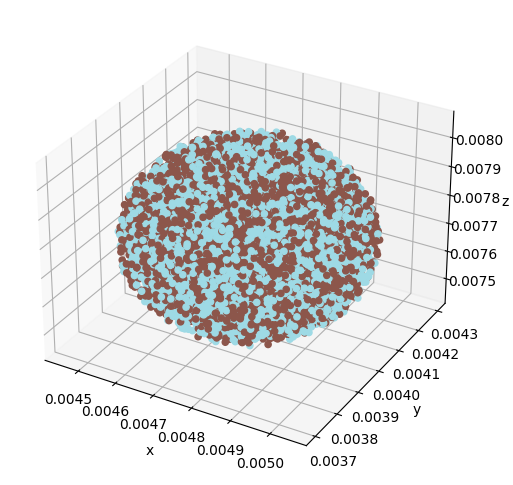

In [3]:
from snudda.plotting import PlotNetwork

pn2 = PlotNetwork(network_file)
pn2.plot_populations(unmarked_alpha=0)
pn2.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn2.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

# Plot neuron input

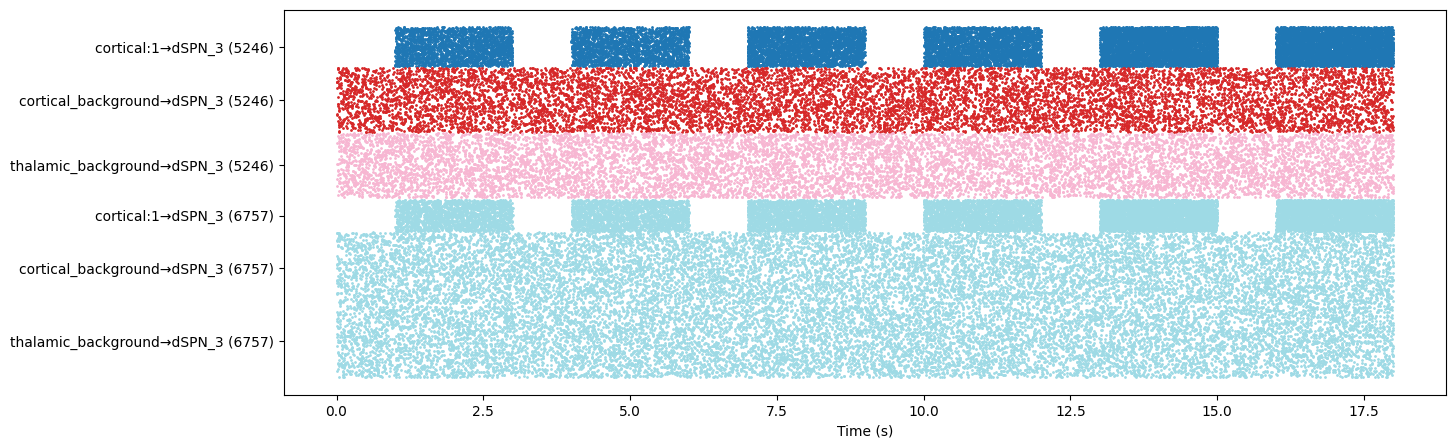

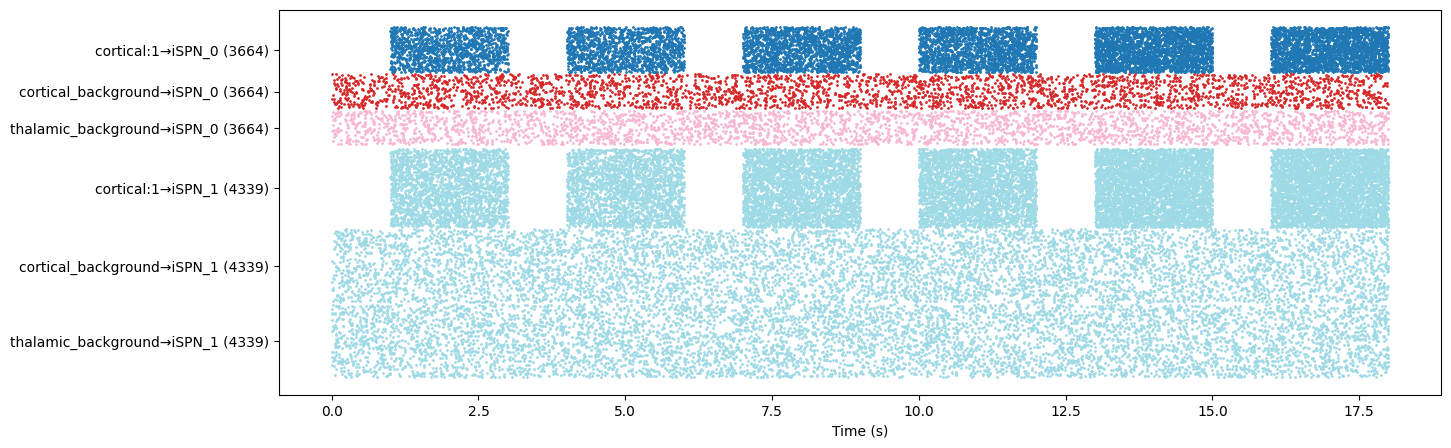

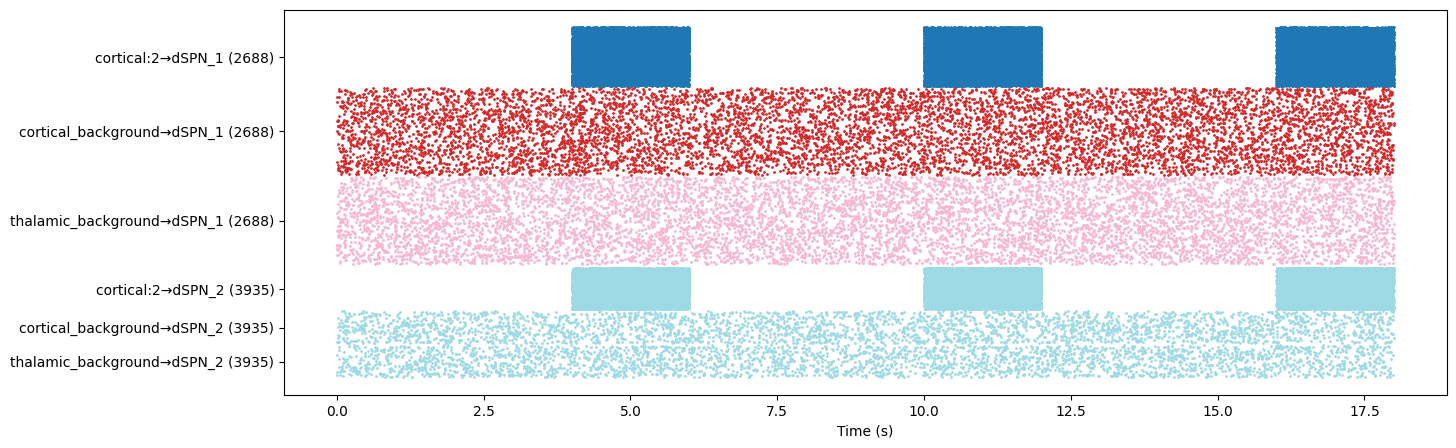

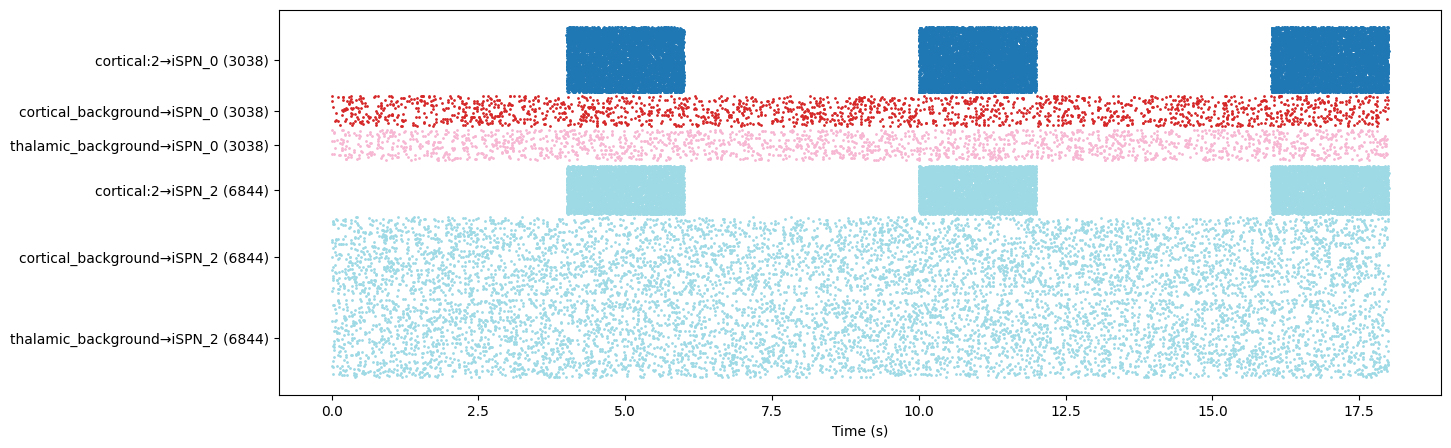

In [4]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file, network_file)
spi.plot_input_population_unit(population_unit_id=1, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=1, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))

In [5]:
# Cleanup
pn = None
spi = None

# Plot neuron activity

## With lateral inhibtion

In [6]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr = SnuddaPlotSpikeRaster2(network_path=network_path, network_file=network_file, simulation_file=simulation_file_with_synapses)# 

# spr.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

Loading ../networks/sten_1/simulation/output-with-synapses-sten_1-A.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
7: (dSPN_0, pe6ec2d4b, m9fda9b20)
8: (dSPN_0, pb0529fb9, m37886c78)
27: (dSPN_1, p75cab3ca, m7fe0fbde)
123: (iSPN_3, pad0f1c3e, m0d1bf3ff)
131: (iSPN_3, p57956f10, m541041a7)
145: (dSPN_1, p6c462b98, m82bef621)
197: (dSPN_0, p7517a0e9, m22be6817)
206: (dSPN_0, p1863c9a5, m22be6817)
208: (dSPN_0, p7aa400d6, mf702205f)
210: (dSPN_0, pe6ec2d4b, mf702205f)
220: (dSPN_1, p6c462b98, m82bef621)
235: (dSPN_1, paeec7411, m7fe0fbde)
245: (dSPN_1, p75cab3ca, mad2e6da1)
254: (dSPN_1, paeec7411, m7fe0fbde)
255: (dSPN_1, p75cab3ca, mad2e6da1)
299: (dSPN_3, pf1939474, m019100c8)
307: (dSPN_3, p723b464b, m615b0265)
321: (dSPN_3, p1dc65e22, m9dda78ad)
464: (iSPN_3, p3154bd2c, m541041a7)
474: (iSPN_3, p55446481, m541041a7)
476: (iSPN_3, p55446481, m1083058d)
477: (iSPN_3, p8bb158ba, m0f5fbaeb)
478: (iSPN_3, p3154bd2c, m541041a7)
487: (iSPN_3

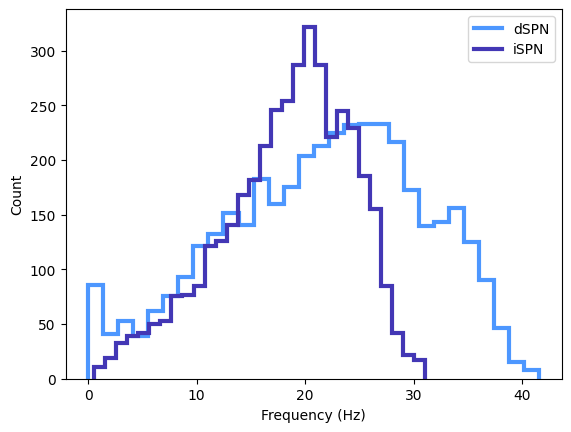

In [7]:
spr.plot_firing_frequency_distribution(bins=30)

Saving figure ../networks/sten_1/figures/spike-frequency-pop-units1-2.pdf


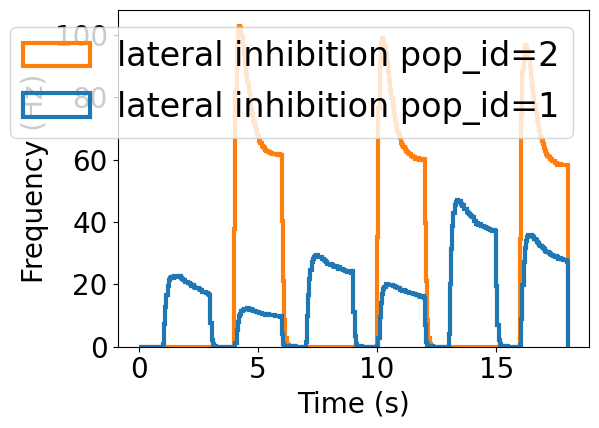

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [8]:
spr.plot_spike_histogram(label_text="lateral inhibition pop_id=")

## Without lateral inhibition

In [9]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr_no = SnuddaPlotSpikeRaster2(network_path=network_path, network_file=network_file, simulation_file=simulation_file_no_synapses)

# spr_no.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

Loading ../networks/sten_1/simulation/output-no-synapses-sten_1-A.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
27: (dSPN_1, p75cab3ca, m7fe0fbde)
116: (iSPN_2, p3e12143b, m54d1813f)
123: (iSPN_3, pad0f1c3e, m0d1bf3ff)
131: (iSPN_3, p57956f10, m541041a7)
143: (dSPN_1, paeec7411, m80fca697)
145: (dSPN_1, p6c462b98, m82bef621)
168: (dSPN_2, pb267a31a, mf0350288)
178: (dSPN_0, p7aa400d6, m9fda9b20)
180: (dSPN_0, pe6ec2d4b, m9fda9b20)
181: (dSPN_0, p1863c9a5, mc710c1a4)
183: (dSPN_0, pd01ac450, mbb8e5b24)
196: (dSPN_0, p1863c9a5, mf702205f)
205: (dSPN_0, p510bab86, mbb8e5b24)
206: (dSPN_0, p1863c9a5, m22be6817)
209: (dSPN_0, pc8cbdb24, mf702205f)
220: (dSPN_1, p6c462b98, m82bef621)
231: (dSPN_1, p75cab3ca, m82894e90)
232: (dSPN_1, pdcbfd03a, mad2e6da1)
235: (dSPN_1, paeec7411, m7fe0fbde)
237: (dSPN_1, p75cab3ca, mad2e6da1)
242: (dSPN_1, p75cab3ca, mc44c4566)
245: (dSPN_1, p75cab3ca, mad2e6da1)
254: (dSPN_1, paeec7411, m7fe0fbde)
255: (dSPN

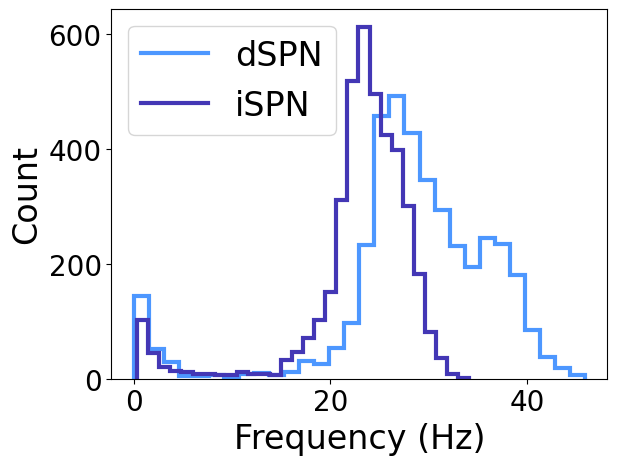

In [10]:
spr_no.plot_firing_frequency_distribution(bins=30)

Saving figure ../networks/sten_1/figures/spike-frequency-pop-units1-2.pdf


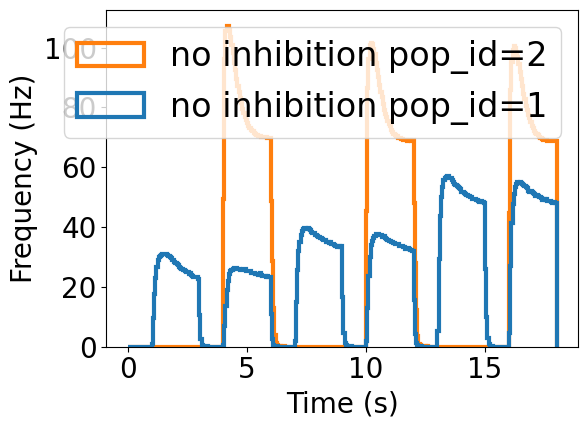

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [11]:
spr_no.plot_spike_histogram(label_text="no inhibition pop_id=")

# Summarising difference in activity (with and without lateral inhibition)

Saving figure ../networks/sten_1/figures/spike-frequency-pop-units1-2.pdf


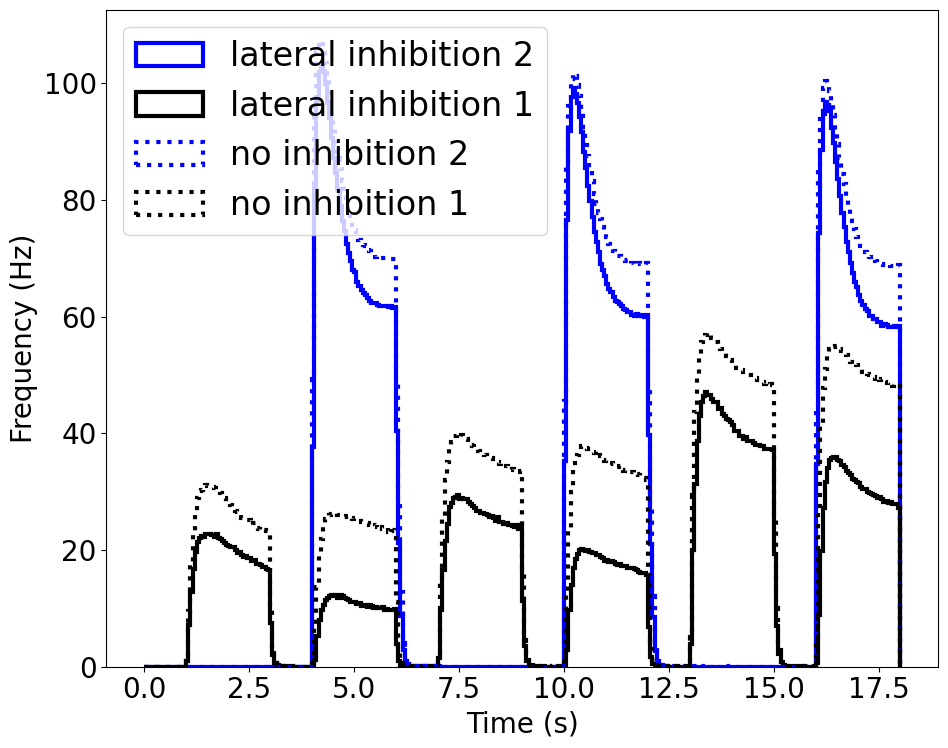

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [12]:
ax = spr.plot_spike_histogram(label_text="lateral inhibition ", show_figure=False, save_figure=False, fig_size=(10,8), colour=["black", "blue"])
spr_no.plot_spike_histogram(ax=ax, label_text="no inhibition ", show_figure=True, save_figure=True, linestyle=":", colour=["black", "blue"])

In [13]:
time_ranges = [(2,3), (5,6), (8,9), (11,12), (14,15), (17,18)]

pop_id1 = spr.snudda_load.get_population_unit_members(population_unit=1)
pop_id2 = spr.snudda_load.get_population_unit_members(population_unit=2)

with_lat_freq_table1 = spr.snudda_simulation_load.get_frequency(neuron_id=pop_id1, time_ranges=time_ranges)
with_lat_freq_table2 = spr.snudda_simulation_load.get_frequency(neuron_id=pop_id2, time_ranges=time_ranges)

no_lat_freq_table1 = spr_no.snudda_simulation_load.get_frequency(neuron_id=pop_id1, time_ranges=time_ranges)
no_lat_freq_table2 = spr_no.snudda_simulation_load.get_frequency(neuron_id=pop_id2, time_ranges=time_ranges)



In [14]:
with_lat_freq1_mean = np.mean(with_lat_freq_table1, axis=0)
with_lat_freq2_mean = np.mean(with_lat_freq_table2, axis=0)
no_lat_freq1_mean = np.mean(no_lat_freq_table1, axis=0)
no_lat_freq2_mean = np.mean(no_lat_freq_table2, axis=0)

n1_cells = with_lat_freq_table1.shape[0]
n2_cells = with_lat_freq_table2.shape[0]

# Standard error of the mean
with_lat_freq1_std = np.std(with_lat_freq_table1, axis=0) / np.sqrt(n1_cells)
with_lat_freq2_std = np.std(with_lat_freq_table2, axis=0) / np.sqrt(n2_cells)
no_lat_freq1_std = np.std(no_lat_freq_table1, axis=0) / np.sqrt(n1_cells)
no_lat_freq2_std = np.std(no_lat_freq_table2, axis=0) / np.sqrt(n2_cells)

In [15]:
print("With lateral inhibition")
for freq1_mean, freq1_std, freq2_mean, freq2_std in zip(with_lat_freq1_mean, with_lat_freq1_std, with_lat_freq2_mean,with_lat_freq2_std):
    print(f"Freq 1: {freq1_mean:.2f} +/- {freq1_std:.2f}\tFreq 2: {freq2_mean:.2f} +/- {freq2_std:.2f}")

With lateral inhibition
Freq 1: 18.60 +/- 0.12	Freq 2: 0.01 +/- 0.00
Freq 1: 10.24 +/- 0.12	Freq 2: 63.00 +/- 0.30
Freq 1: 25.01 +/- 0.14	Freq 2: 0.00 +/- 0.00
Freq 1: 17.05 +/- 0.17	Freq 2: 61.63 +/- 0.31
Freq 1: 38.62 +/- 0.18	Freq 2: 0.00 +/- 0.00
Freq 1: 29.09 +/- 0.22	Freq 2: 59.67 +/- 0.32


In [16]:
print("No lateral inhibition")
for freq1_mean, freq1_std, freq2_mean, freq2_std in zip(no_lat_freq1_mean, no_lat_freq1_std, no_lat_freq2_mean,no_lat_freq2_std):
    print(f"Freq 1: {freq1_mean:.2f} +/- {freq1_std:.2f}\tFreq 2: {freq2_mean:.2f} +/- {freq2_std:.2f}")

No lateral inhibition
Freq 1: 25.06 +/- 0.11	Freq 2: 0.01 +/- 0.00
Freq 1: 24.24 +/- 0.11	Freq 2: 71.15 +/- 0.45
Freq 1: 34.82 +/- 0.11	Freq 2: 0.01 +/- 0.00
Freq 1: 33.64 +/- 0.12	Freq 2: 70.04 +/- 0.45
Freq 1: 49.75 +/- 0.17	Freq 2: 0.02 +/- 0.02
Freq 1: 49.38 +/- 0.17	Freq 2: 69.75 +/- 0.46


In [17]:
with_lat_n_firing1 = np.sum(with_lat_freq_table1 > 0, axis=0)
with_lat_n_firing2 = np.sum(with_lat_freq_table2 > 0, axis=0)

no_lat_n_firing1 = np.sum(no_lat_freq_table1 > 0, axis=0)
no_lat_n_firing2 = np.sum(no_lat_freq_table2 > 0, axis=0)

In [18]:
print("With lateral inhibition")
for n1_active, n2_active in zip(with_lat_n_firing1, with_lat_n_firing2):
    print(f"Neurons active 1: {n1_active}/{n1_cells}\tNeurons active 2: {n2_active}/{n2_cells}")

With lateral inhibition
Neurons active 1: 3975/4000	Neurons active 2: 16/4000
Neurons active 1: 3636/4000	Neurons active 2: 3870/4000
Neurons active 1: 3961/4000	Neurons active 2: 12/4000
Neurons active 1: 3783/4000	Neurons active 2: 3865/4000
Neurons active 1: 3962/4000	Neurons active 2: 5/4000
Neurons active 1: 3884/4000	Neurons active 2: 3838/4000


In [19]:
print("No lateral inhibition")
for n1_active, n2_active in zip(no_lat_n_firing1, no_lat_n_firing2):
    print(f"Neurons active 1: {n1_active}/{n1_cells}\tNeurons active 2: {n2_active}/{n2_cells}")

No lateral inhibition
Neurons active 1: 3970/4000	Neurons active 2: 24/4000
Neurons active 1: 3952/4000	Neurons active 2: 3583/4000
Neurons active 1: 3971/4000	Neurons active 2: 16/4000
Neurons active 1: 3964/4000	Neurons active 2: 3558/4000
Neurons active 1: 3963/4000	Neurons active 2: 12/4000
Neurons active 1: 3961/4000	Neurons active 2: 3535/4000


In [20]:
# Cleanup
spr = None
spr_no = None

# Plotting the traces for the two cases to make sure it looks ok

In [21]:
from snudda.plotting.plot_traces import PlotTraces
pt_with_syn = PlotTraces(output_file=simulation_file_with_synapses, network_file=network_file)
# Use trace_id to specify which traces


Loading network info from ../networks/sten_1/network-synapses-minimal.hdf5
Loading input info from ../networks/sten_1/input-spikes.hdf5
Loading ../networks/sten_1/simulation/output-with-synapses-sten_1-A.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
7: (dSPN_0, pe6ec2d4b, m9fda9b20)
8: (dSPN_0, pb0529fb9, m37886c78)
27: (dSPN_1, p75cab3ca, m7fe0fbde)
123: (iSPN_3, pad0f1c3e, m0d1bf3ff)
131: (iSPN_3, p57956f10, m541041a7)
145: (dSPN_1, p6c462b98, m82bef621)
197: (dSPN_0, p7517a0e9, m22be6817)
206: (dSPN_0, p1863c9a5, m22be6817)
208: (dSPN_0, p7aa400d6, mf702205f)
210: (dSPN_0, pe6ec2d4b, mf702205f)
220: (dSPN_1, p6c462b98, m82bef621)
235: (dSPN_1, paeec7411, m7fe0fbde)
245: (dSPN_1, p75cab3ca, mad2e6da1)
254: (dSPN_1, paeec7411, m7fe0fbde)
255: (dSPN_1, p75cab3ca, mad2e6da1)
299: (dSPN_3, pf1939474, m019100c8)
307: (dSPN_3, p723b464b, m615b0265)
321: (dSPN_3, p1dc65e22, m9dda78ad)
464: (iSPN_3, p3154bd2c, m541041a7)
474: (iSPN_3, p55446

In [22]:
pop_id_1 = pt_with_syn.network_info.get_population_unit_members(population_unit=1, num_neurons=30)
pop_id_2 = pt_with_syn.network_info.get_population_unit_members(population_unit=2, num_neurons=30)

Plotting traces: [ 4  5  9 13 14 15 16 19 20 22 24 25 26 28 29 30 31 34 36 39 40 43 44 45
 46 48 52 56 59 63]
Plotted 30 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1/figures/Network-voltage-trace--dSPN-iSPN.pdf


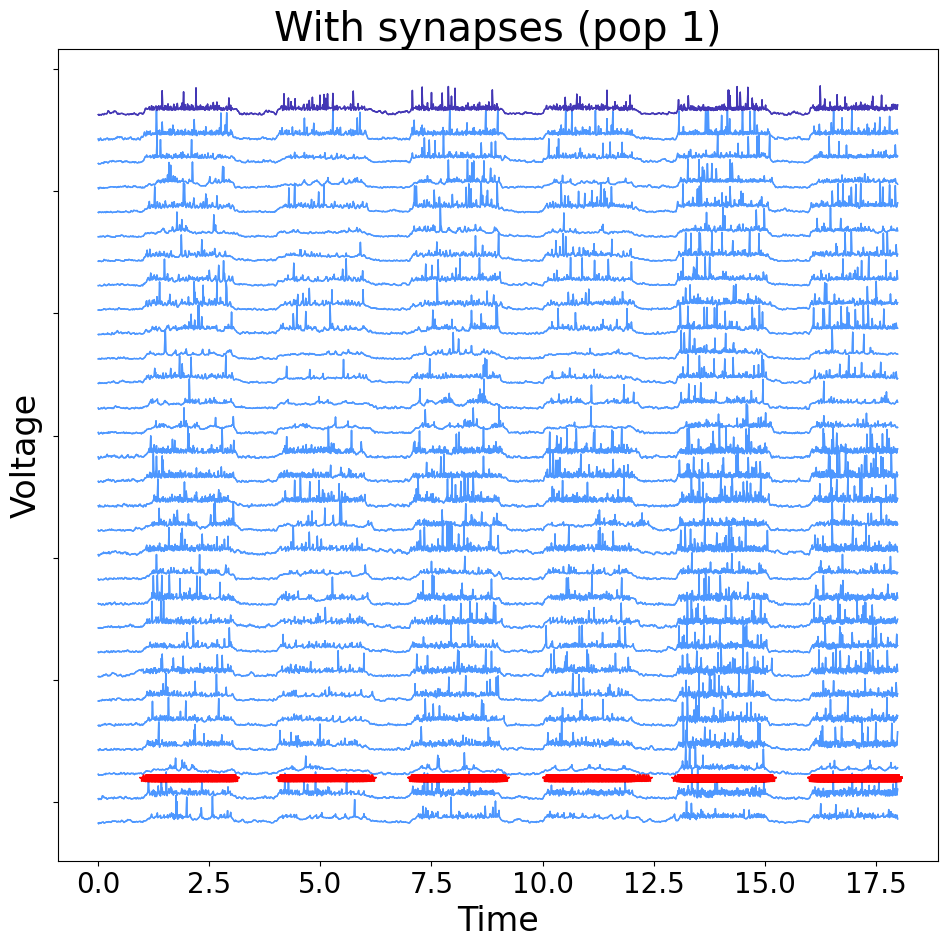

In [23]:
ax = pt_with_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="With synapses (pop 1)",
                            trace_id=pop_id_1)

Plotting traces: [ 0  1  2  3  6  7  8 10 11 12 17 18 21 23 27 32 33 35 37 38 41 42 47 49
 50 51 53 54 55 57]
Plotted 30 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1/figures/Network-voltage-trace--dSPN-traces.pdf


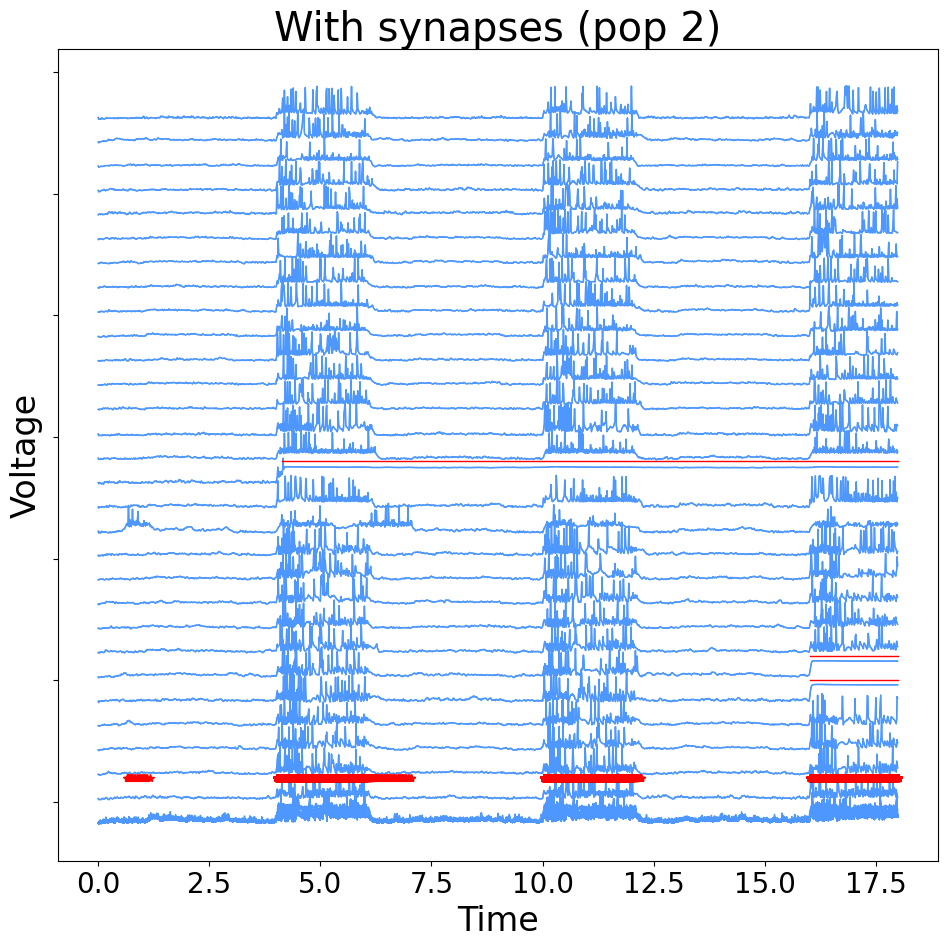

In [24]:
ax = pt_with_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="With synapses (pop 2)",
                            trace_id=pop_id_2)

In [25]:
from snudda.plotting.plot_traces import PlotTraces
pt_no_syn = PlotTraces(output_file=simulation_file_no_synapses, network_file=network_file)
# Use trace_id to specify which traces

Loading network info from ../networks/sten_1/network-synapses-minimal.hdf5
Loading input info from ../networks/sten_1/input-spikes.hdf5
Loading ../networks/sten_1/simulation/output-no-synapses-sten_1-A.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
27: (dSPN_1, p75cab3ca, m7fe0fbde)
116: (iSPN_2, p3e12143b, m54d1813f)
123: (iSPN_3, pad0f1c3e, m0d1bf3ff)
131: (iSPN_3, p57956f10, m541041a7)
143: (dSPN_1, paeec7411, m80fca697)
145: (dSPN_1, p6c462b98, m82bef621)
168: (dSPN_2, pb267a31a, mf0350288)
178: (dSPN_0, p7aa400d6, m9fda9b20)
180: (dSPN_0, pe6ec2d4b, m9fda9b20)
181: (dSPN_0, p1863c9a5, mc710c1a4)
183: (dSPN_0, pd01ac450, mbb8e5b24)
196: (dSPN_0, p1863c9a5, mf702205f)
205: (dSPN_0, p510bab86, mbb8e5b24)
206: (dSPN_0, p1863c9a5, m22be6817)
209: (dSPN_0, pc8cbdb24, mf702205f)
220: (dSPN_1, p6c462b98, m82bef621)
231: (dSPN_1, p75cab3ca, m82894e90)
232: (dSPN_1, pdcbfd03a, mad2e6da1)
235: (dSPN_1, paeec7411, m7fe0fbde)
237: (dSPN_1, p75c

In [26]:
pop_id_1 = pt_no_syn.network_info.get_population_unit_members(population_unit=1, num_neurons=30)
pop_id_2 = pt_no_syn.network_info.get_population_unit_members(population_unit=2, num_neurons=30)

Plotting traces: [ 4  5  9 13 14 15 16 19 20 22 24 25 26 28 29 30 31 34 36 39 40 43 44 45
 46 48 52 56 59 63]
Plotted 30 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1/figures/Network-voltage-trace--dSPN-iSPN.pdf


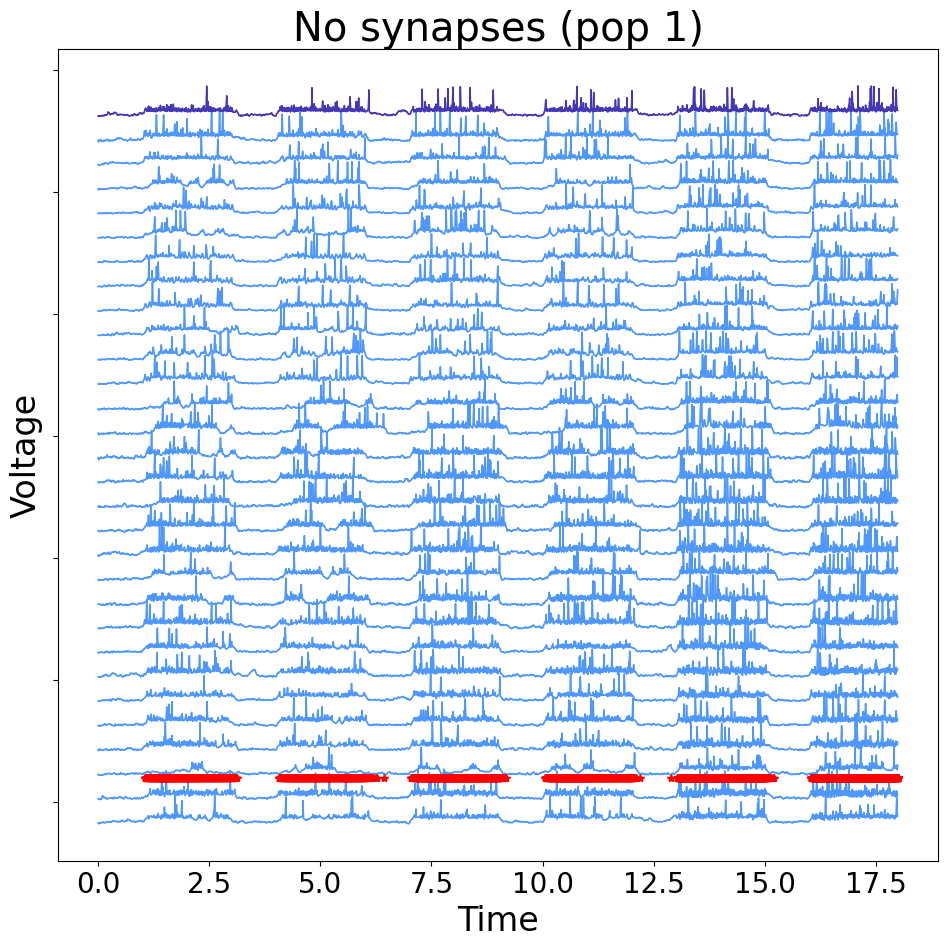

In [27]:
ax = pt_no_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="No synapses (pop 1)",
                           trace_id=pop_id_1)

Plotting traces: [ 0  1  2  3  6  7  8 10 11 12 17 18 21 23 27 32 33 35 37 38 41 42 47 49
 50 51 53 54 55 57]
Plotted 30 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1/figures/Network-voltage-trace--dSPN-traces.pdf


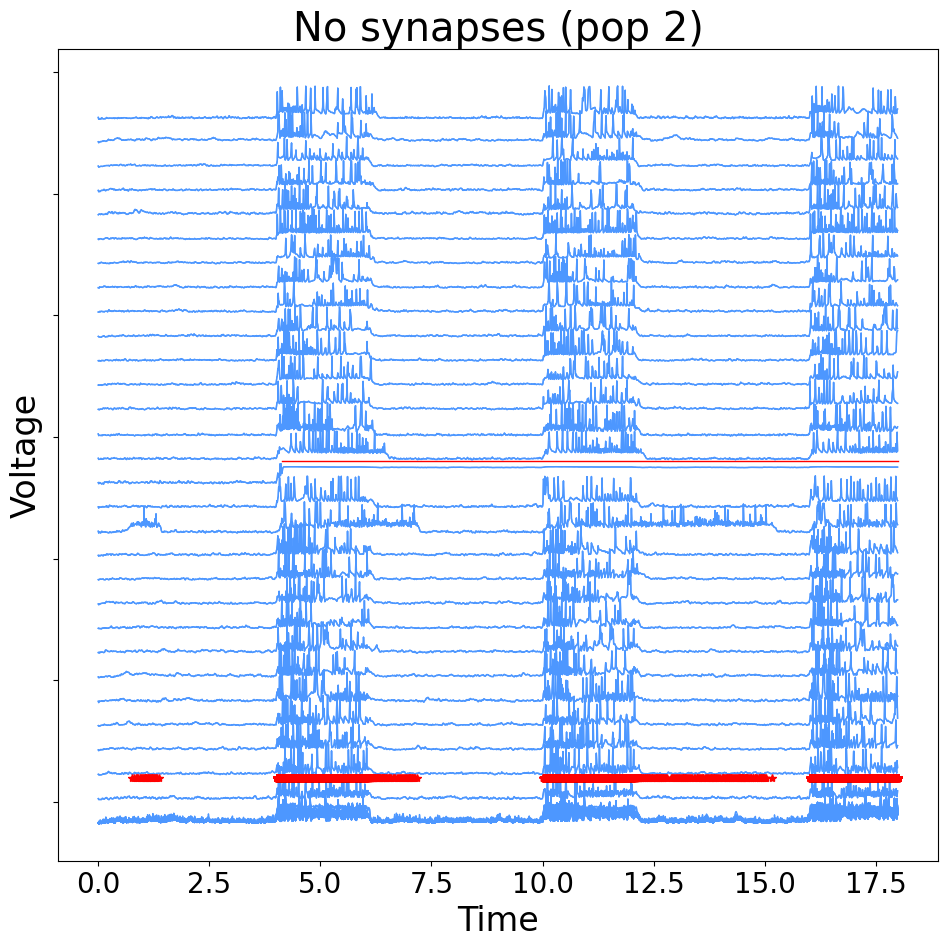

In [28]:
ax = pt_no_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="No synapses (pop 2)",
                           trace_id=pop_id_2)

# Plot neuron with depolarisation block

In [29]:
bad_idx_with_syn = np.unique([x[0] for x in pt_with_syn.output_load.depolarisation_block])
bad_idx_no_syn = np.unique([x[0] for x in pt_no_syn.output_load.depolarisation_block])

# Should be same network (with syn and without syn)
pop_id_1 = pt_with_syn.network_info.get_population_unit_members(population_unit=1)
pop_id_2 = pt_with_syn.network_info.get_population_unit_members(population_unit=2)

bad_idx_with_syn_1 = np.intersect1d(bad_idx_with_syn, pop_id_1)
bad_idx_with_syn_2 = np.intersect1d(bad_idx_with_syn, pop_id_2)

bad_idx_no_syn_1 = np.intersect1d(bad_idx_no_syn, pop_id_1)
bad_idx_no_syn_2 = np.intersect1d(bad_idx_no_syn, pop_id_2)

Plotting traces: [ 536  753  922  928 1126 1198 1429 1447 1454 1794 1807 1808 1816 1829
 2175 2184 2496 2503 2619 2656 3055 3118 3360 3473 3477 3492 3833 3850
 4158 4167 4465 4475 4479 4822 4823 4832 4833 5395 5727 5729 6349 7068
 7239 7330 7458 7465 7471 7771 7775 7776 7879 7882 7884 7982]
Plotted 54 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1/figures/Network-voltage-trace--dSPN-traces.pdf


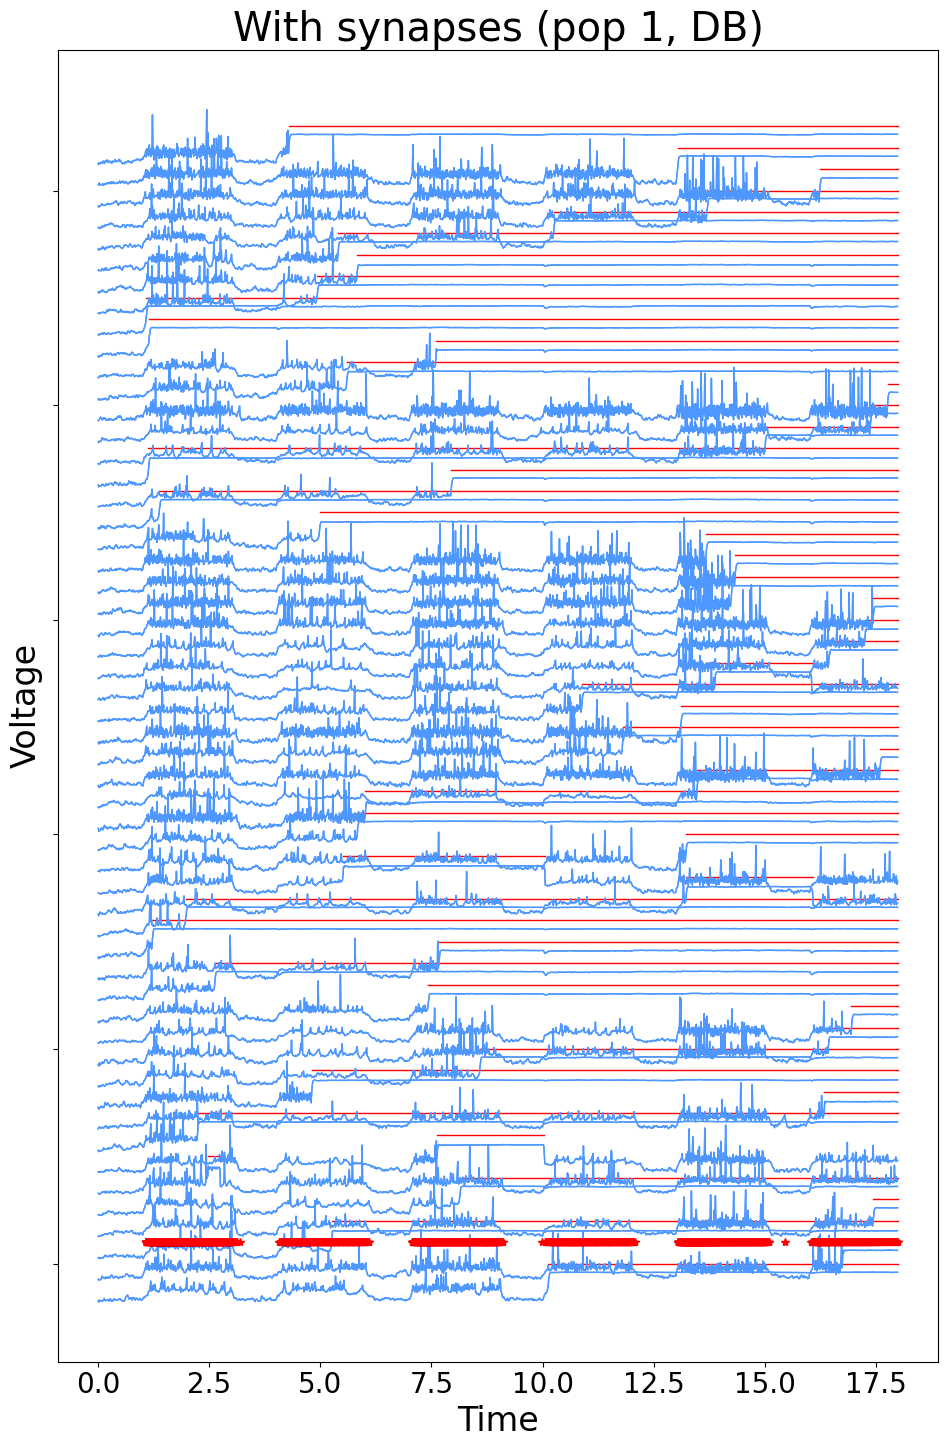

In [30]:
ax = pt_with_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="With synapses (pop 1, DB)",
                            trace_id=bad_idx_with_syn_1)

Plotting traces: [   7    8   27  123  131  145  197  206  208  210  220  235  245  254
  255  299  307  321  464  474  476  477  478  487  488  489  494  498
  533  538  539  541  556  744  765  769  771  839  840  845  863  910
  914  917  926  934  956  997 1015 1075 1076 1080 1081 1084 1089 1092
 1093 1097 1113 1136 1151 1381 1383 1384 1386 1388 1393 1395 1396 1402
 1419 1430 1450 1477 1478 1498 1507 1565 1627 1741 1747 1761 1786 1791
 1796 1817 1823 1856 1857 1872 1878 1887 1986 1999 2003 2121 2124 2126
 2127 2128 2141 2144 2146 2147 2154 2159 2194 2216 2245 2298 2301 2446
 2448 2449 2450 2454 2456 2473 2475 2482 2605 2610 2611 2624 2653 2683
 2689 2694 2704 2710 2760 2786 2795 2960 2970 2972 2973 2975 2985 2988
 3000 3003 3008 3009 3050 3051 3065 3108 3110 3112 3121 3126 3127 3129
 3132 3137 3193 3194 3200 3201 3215 3257 3298 3307 3319 3322 3324 3326
 3329 3359 3403 3404 3405 3408 3463 3501 3510 3519 3520 3536 3537 3604
 3639 3686 3798 3809 3813 3832 3852 3861 3864 3869 3881 3883

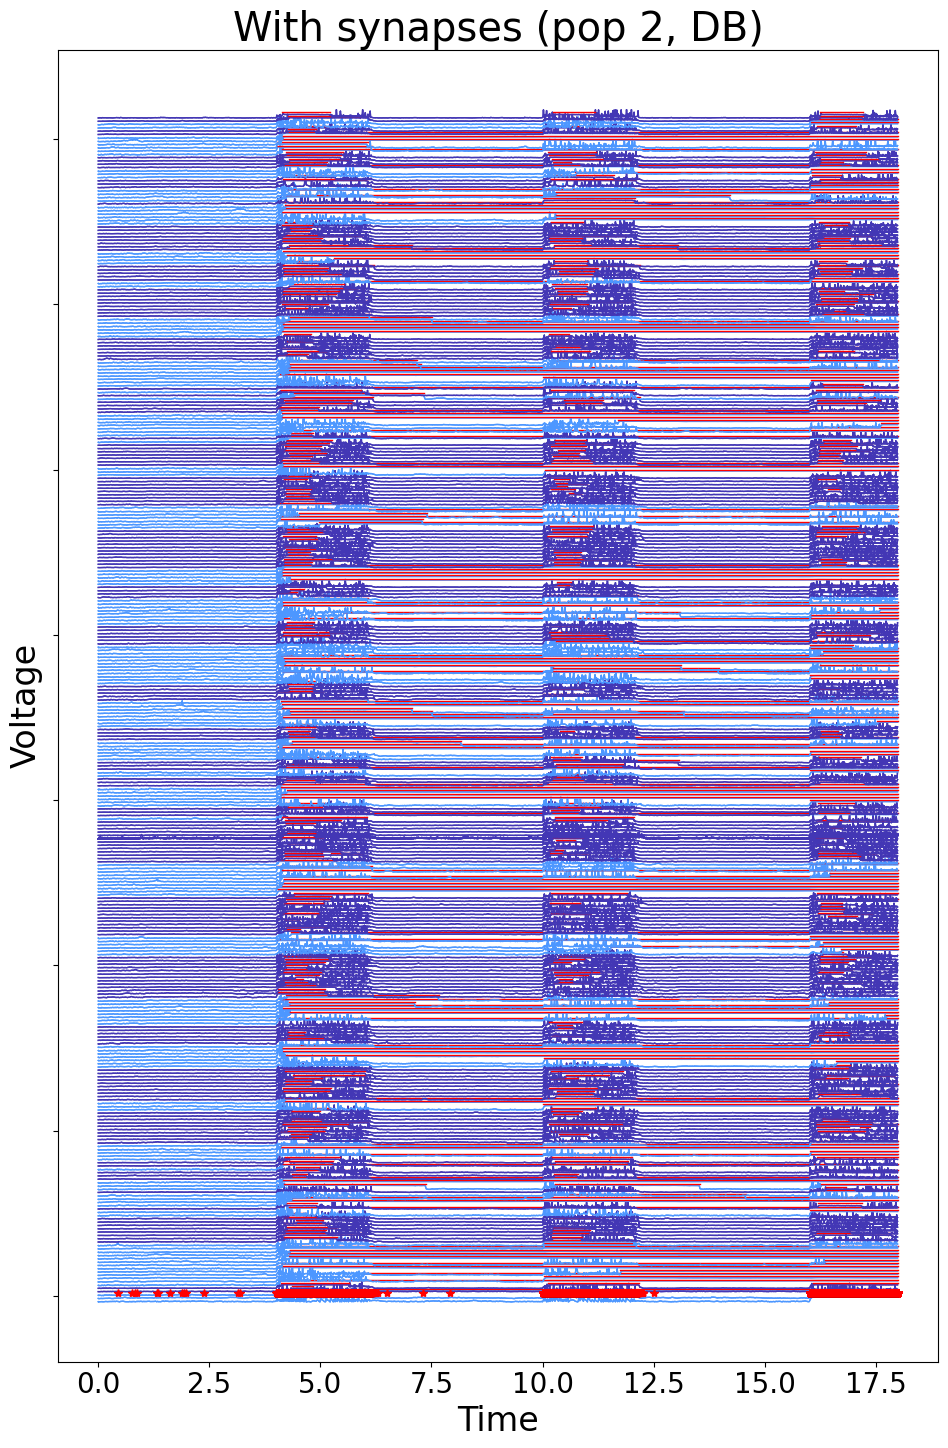

In [31]:
ax = pt_with_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="With synapses (pop 2, DB)",
                            trace_id=bad_idx_with_syn_2)

Plotting traces: [ 168  309  466 1126 1127 1133 1752 1807 1822 1829 2138 2158 2161 2629
 2642 2643 2644 3077 3420 3492 3513 4169 4479 4807 4822 4837 5397 5424
 5707 5711 6630 6635 6733 7059 7107 7190 7535 7775 7879 7980]
Plotted 40 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1/figures/Network-voltage-trace--dSPN-iSPN.pdf


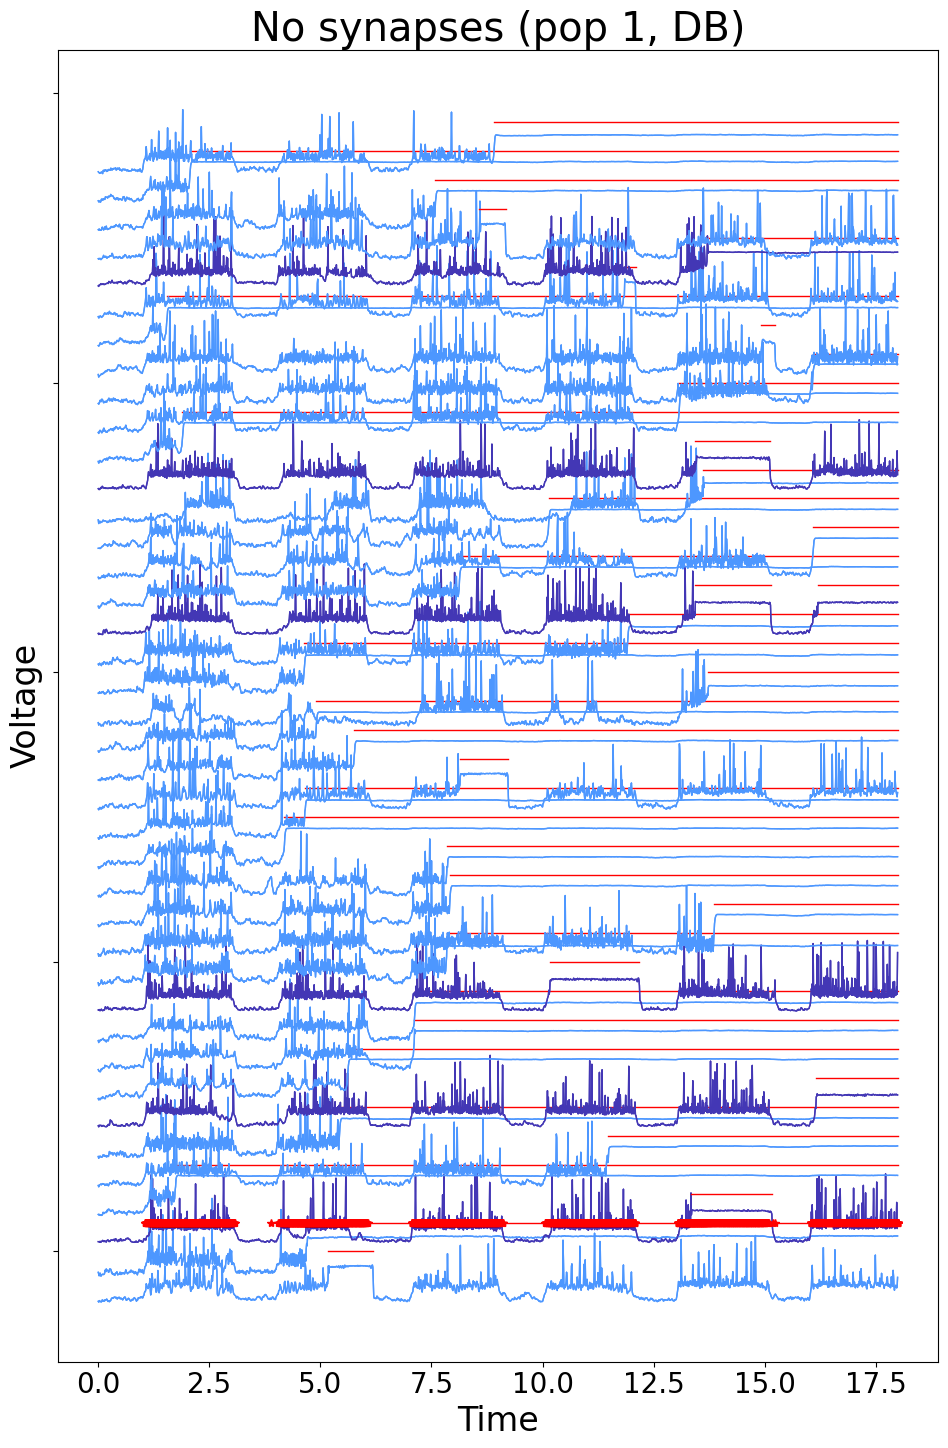

In [32]:
ax = pt_no_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="No synapses (pop 1, DB)",
                           trace_id=bad_idx_no_syn_1)

Plotting traces: [  27  116  123  131  143  145  178  180  181  183  196  205  206  209
  220  231  232  235  237  242  245  254  255  299  413  457  464  474
  476  477  478  481  485  487  488  489  498  500  533  538  539  541
  562  567  569  571  601  702  729  732  743  744  759  760  765  767
  768  769  771  830  839  840  845  849  851  853  860  863  903  905
  906  910  912  914  916  931  951  956  960 1075 1076 1078 1080 1081
 1084 1087 1089 1092 1093 1097 1120 1121 1129 1136 1151 1161 1164 1232
 1336 1364 1372 1381 1383 1384 1386 1388 1391 1393 1395 1396 1402 1407
 1411 1419 1425 1457 1469 1477 1478 1480 1498 1507 1525 1582 1701 1710
 1720 1726 1741 1747 1761 1764 1769 1770 1771 1786 1788 1806 1809 1817
 1823 1833 1840 1844 1845 1856 1857 1865 1872 1875 1878 1879 1887 2121
 2123 2124 2126 2127 2128 2130 2137 2139 2141 2142 2144 2146 2147 2150
 2151 2154 2155 2192 2215 2216 2230 2412 2415 2416 2439 2446 2448 2449
 2450 2454 2456 2457 2471 2473 2475 2480 2482 2484 2487 2488

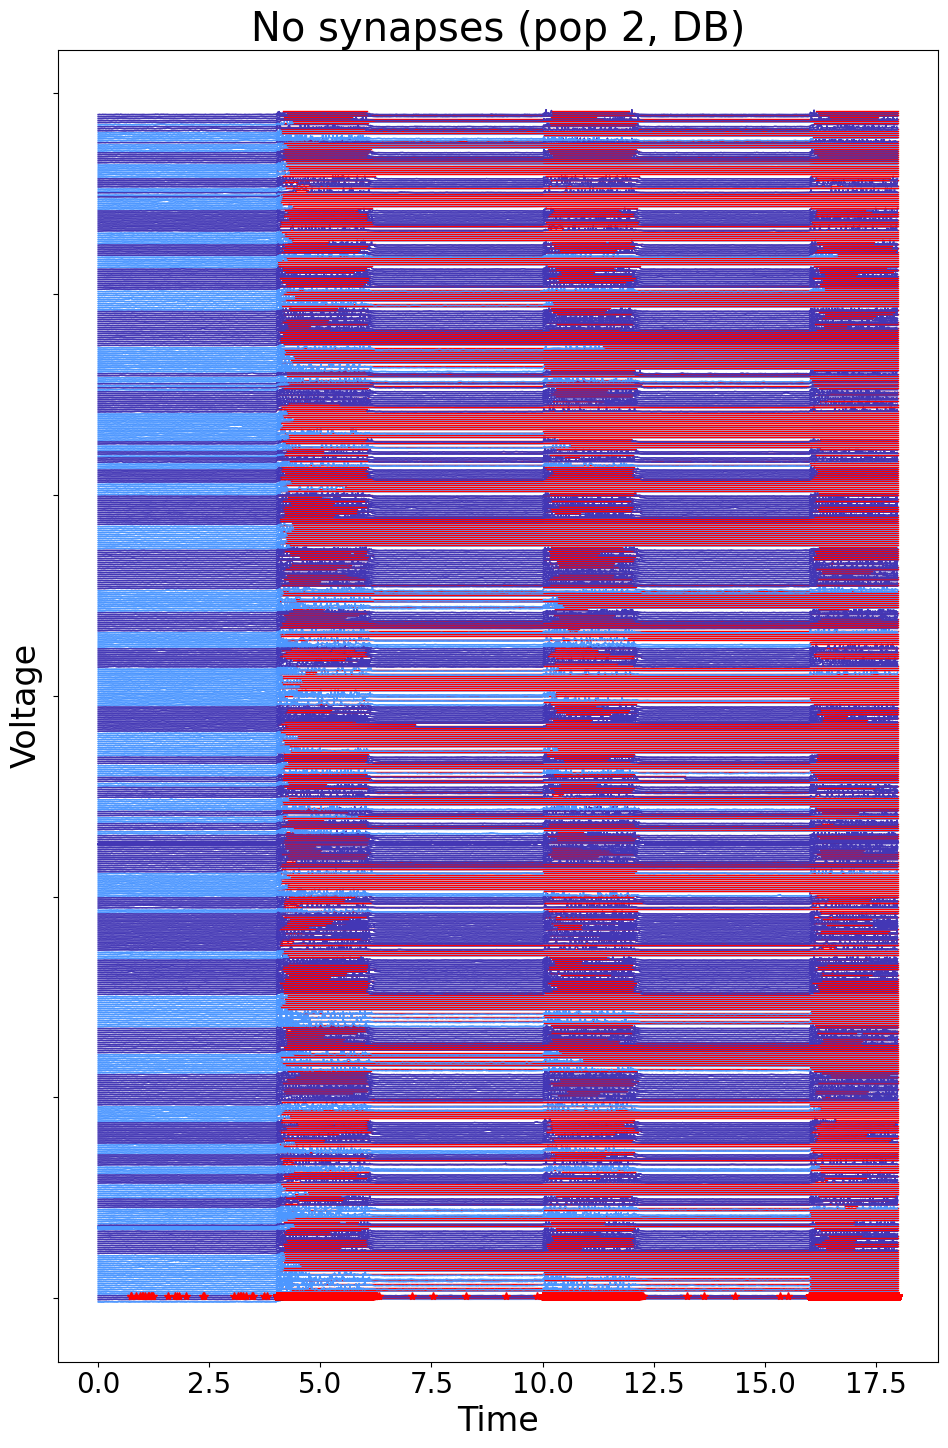

In [33]:
ax = pt_no_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="No synapses (pop 2, DB)",
                           trace_id=bad_idx_no_syn_2)